In [1]:
  pip install google-cloud-bigquery

  Using cached pyasn1-0.5.1-py2.py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/232.6 kB ? eta -:--:--
   --------------- ------------------------ 92.2/232.6 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 232.6/232.6 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/138.3 kB ? eta -:--:--
   ---------------------------------------- 138.3/138.3 kB 8.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/189.2 kB ? eta -:--:--
   --------------------------------------- 189.2/189.2 kB 11.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/80.6 kB ? eta -:--:--
   ---------------------------------------- 80.6/80.6 kB ? eta 0:00:00
   ---------------------------------------- 0.0/229.1 kB ? eta -:--:--
   --------------------------------------- 229.1/229.1 kB 13.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -------- ----------------------------

In [2]:
from google.cloud import bigquery

client = bigquery.Client(project='nk-cloud-course-iav-21')

In [6]:
table_ref = client.dataset('food_delivery').table('courier_actions')
job_config = bigquery.LoadJobConfig()
job_config.source_format = bigquery.SourceFormat.CSV
job_config.skip_leading_rows = 1
job_config.schema = [
    bigquery.SchemaField('courier_id', 'INTEGER', 'REQUIRED'),
    bigquery.SchemaField('order_id', 'INTEGER', 'REQUIRED'),
    bigquery.SchemaField('action', 'STRING', 'REQUIRED'),
    bigquery.SchemaField('time', 'DATETIME', 'REQUIRED'),
]
with open('data_lab_1/courier_actions.csv', 'rb') as source_file:
    client.load_table_from_file(
        source_file, table_ref, job_config=job_config)

In [13]:
table_ref = client.dataset('food_delivery').table('couriers')
job_config = bigquery.LoadJobConfig()
job_config.source_format = bigquery.SourceFormat.CSV
job_config.skip_leading_rows = 1
job_config.schema = [
    bigquery.SchemaField('courier_id', 'INTEGER', 'REQUIRED'),
    bigquery.SchemaField('birth_date', 'DATE', 'REQUIRED'),
    bigquery.SchemaField('sex', 'STRING', 'REQUIRED'),
]
with open('data_lab_1/couriers.csv', 'rb') as source_file:
    client.load_table_from_file(
        source_file, table_ref, job_config=job_config)

In [12]:
table_ref = client.dataset('food_delivery').table('orders')
job_config = bigquery.LoadJobConfig()
job_config.source_format = bigquery.SourceFormat.NEWLINE_DELIMITED_JSON
job_config.schema = [
    bigquery.SchemaField('order_id', 'INTEGER', 'REQUIRED'),
    bigquery.SchemaField('creation_time', 'DATETIME', 'REQUIRED'),
    bigquery.SchemaField('product_ids', 'INTEGER', 'REPEATED'),
]
with open('data_lab_1/orders.json', 'rb') as source_file:
    client.load_table_from_file(
        source_file, table_ref, job_config=job_config)

In [15]:
table_ref = client.dataset('food_delivery').table('products')
job_config = bigquery.LoadJobConfig()
job_config.source_format = bigquery.SourceFormat.CSV
job_config.skip_leading_rows = 1
job_config.schema = [
    bigquery.SchemaField('product_id', 'INTEGER', 'REQUIRED'),
    bigquery.SchemaField('name', 'STRING', 'REQUIRED'),
    bigquery.SchemaField('price', 'FLOAT', 'REQUIRED'),
]
with open('data_lab_1/products.csv', 'rb') as source_file:
    client.load_table_from_file(
        source_file, table_ref, job_config=job_config)

In [17]:
table_ref = client.dataset('food_delivery').table('user_actions')
job_config = bigquery.LoadJobConfig()
job_config.source_format = bigquery.SourceFormat.CSV
job_config.skip_leading_rows = 1
job_config.schema = [
    bigquery.SchemaField('user_id', 'INTEGER', 'REQUIRED'),
    bigquery.SchemaField('order_id', 'INTEGER', 'REQUIRED'),
    bigquery.SchemaField('action', 'STRING', 'REQUIRED'),
    bigquery.SchemaField('time', 'DATETIME', 'REQUIRED'),
]
with open('data_lab_1/user_actions.csv', 'rb') as source_file:
    client.load_table_from_file(
        source_file, table_ref, job_config=job_config)

In [20]:
table_ref = client.dataset('food_delivery').table('users')
job_config = bigquery.LoadJobConfig()
job_config.source_format = bigquery.SourceFormat.CSV
job_config.skip_leading_rows = 1
job_config.schema = [
    bigquery.SchemaField('user_id', 'INTEGER', 'REQUIRED'),
    bigquery.SchemaField('birth_date', 'DATE', 'REQUIRED'),
    bigquery.SchemaField('sex', 'STRING', 'REQUIRED'),
]
with open('data_lab_1/users.csv', 'rb') as source_file:
    client.load_table_from_file(
        source_file, table_ref, job_config=job_config)

In [23]:
# Який товар має найдовшу назву?
query = """
SELECT name
FROM `nk-cloud-course-iav-21.food_delivery.products`
ORDER BY LENGTH(name) DESC
LIMIT 1
"""
query_job = client.query(query)
for row in query_job:
    print(row.name)

fruit drink blueberry


In [26]:
# Які користувачі зробили найбільше замовлень?
query = """
SELECT user_id, COUNT(order_id) AS orders_count
FROM `nk-cloud-course-iav-21.food_delivery.user_actions`
WHERE action = 'create_order'
GROUP BY user_id
ORDER BY orders_count DESC
LIMIT 10
"""
query_job = client.query(query)
for row in query_job:
    print(row.user_id)

3793
362
3922
803
3333
3941
2077
1170
1641
2059


In [33]:
# Підвищить ціну на 5% тільки на товари, вартість яких перевищує 100 одиниць. Ціну решти товарів залиште без змін. Також не підвищуйте ціну на ікру (caviar), яка й так коштує 800 одиниць. Виведіть id та найменування всіх товарів, їх стару та нову ціну.
query = """
SELECT product_id
FROM `nk-cloud-course-iav-21.food_delivery.products`
WHERE price > 100 AND name != 'caviar'
"""
product_ids_to_update = client.query(query)

query = """
UPDATE `nk-cloud-course-iav-21.food_delivery.products`
SET price = price * 1.05
WHERE product_id IN ({})
""".format(', '.join([str(row.product_id) for row in product_ids_to_update]))

query = """
SELECT product_id, name, price / 1.05 AS old_price, price AS new_price
FROM `nk-cloud-course-iav-21.food_delivery.products`
WHERE product_id IN ({})
UNION ALL
SELECT product_id, name, price AS old_price, price AS new_price
FROM `nk-cloud-course-iav-21.food_delivery.products`
WHERE product_id NOT IN ({})
""".format(', '.join([str(row.product_id) for row in product_ids_to_update]), ', '.join([str(row.product_id) for row in product_ids_to_update]))

query_job = client.query(query)
for row in query_job:
    print(row.product_id, row.name, row.old_price, row.new_price)


SELECT product_id, name, price / 1.05 AS old_price, price AS new_price
FROM `nk-cloud-course-iav-21.food_delivery.products`
WHERE product_id IN (57, 15, 22, 75, 62, 16, 24, 59, 87, 30, 55, 1, 56, 25, 7, 29, 69, 19, 68, 12, 66, 21, 27, 17, 61, 77, 51, 64, 85, 11, 43, 37, 36)
UNION ALL
SELECT product_id, name, price AS old_price, price AS new_price
FROM `nk-cloud-course-iav-21.food_delivery.products`
WHERE product_id NOT IN (57, 15, 22, 75, 62, 16, 24, 59, 87, 30, 55, 1, 56, 25, 7, 29, 69, 19, 68, 12, 66, 21, 27, 17, 61, 77, 51, 64, 85, 11, 43, 37, 36)

10 seeds 12.0 12.0
5 coffee 3 in 1 15.0 15.0
73 cake 15.0 15.0
6 crackers 25.0 25.0
8 drying 30.0 30.0
81 vinegar 30.0 30.0
67 salt 30.0 30.0
82 pita 30.0 30.0
40 bread 40.0 40.0
4 lollipops 46.0 46.0
46 cookie 46.0 46.0
2 green tea bags 50.0 50.0
80 chewing gum 50.0 50.0
20 long loaf 50.0 50.0
47 sour cream 50.0 50.0
76 black tea bags 56.0 56.0
18 ketchup 58.0 58.0
74 milk 60.0 60.0
60 white chocolate 60.0 60.0
14 mayonnaise 60.0 60.0
4

In [34]:
# Розрахуйте вік наймолодшого кур’єра з таблиці couriers.
query = """
SELECT DATE_DIFF(CURRENT_DATE(), birth_date, YEAR) AS age
FROM `nk-cloud-course-iav-21.food_delivery.couriers`
ORDER BY age
LIMIT 1
"""
query_job = client.query(query)
for row in query_job:
    print(row.age)

17


In [35]:
# Використовуючи функцію DATE_TRUNC, порахуйте, скільки замовлень було зроблено та скільки було скасовано кожного місяця. Розрахунки проводьте за таблицею user_actions.
query = """
SELECT DATE_TRUNC(time, MONTH) AS month, action, COUNT(order_id) AS orders_count
FROM `nk-cloud-course-iav-21.food_delivery.user_actions`
WHERE action IN ('create_order', 'cancel_order')
GROUP BY month, action
ORDER BY month, action
"""
query_job = client.query(query)
for row in query_job:
    print(row.month, row.action, row.orders_count)

2022-08-01 00:00:00 cancel_order 967
2022-08-01 00:00:00 create_order 18799
2022-09-01 00:00:00 cancel_order 2012
2022-09-01 00:00:00 create_order 40796


In [10]:
# За таблицями orders та courier_actions визначте id десяти замовлень, які доставляли найдовше. Тобто знайти order_id, для яких різниця між часом створення та часом доставки була найбільшою.
query = """
WITH orders_delivery_time AS (
    SELECT order_id, TIMESTAMP_DIFF(
        (SELECT time FROM `nk-cloud-course-iav-21.food_delivery.courier_actions` WHERE order_id = o.order_id AND action = 'deliver_order'),
        creation_time,
        SECOND
    ) AS delivery_time
    FROM `nk-cloud-course-iav-21.food_delivery.orders` o
)
SELECT order_id, delivery_time
FROM orders_delivery_time
ORDER BY delivery_time DESC
LIMIT 1000
"""

query_job = client.query(query)
for row in query_job:
    print(row.order_id, row.delivery_time)

22408 1920
58491 1920
1155 1860
11064 1860
22907 1860
28846 1860
14647 1860
4788 1860
43479 1860
44804 1860
46177 1860
29808 1860
1464 1860
18991 1860
12150 1860
26326 1860
54863 1860
19974 1800
55311 1800
31739 1800
41393 1800
22026 1800
7444 1800
22880 1800
22200 1800
10592 1800
34272 1800
3365 1800
43075 1800
5237 1800
35988 1800
17808 1800
16666 1800
49506 1800
52561 1800
10130 1800
40427 1800
32 1800
39916 1800
44909 1800
19207 1800
2021 1740
45196 1740
48501 1740
6865 1740
3697 1740
56659 1740
6013 1740
7639 1740
33958 1740
47309 1740
3644 1740
46829 1740
24401 1740
11264 1740
4872 1740
2172 1740
55574 1740
51388 1740
51323 1740
8017 1740
45343 1740
47131 1740
51610 1740
39716 1740
24180 1740
18202 1740
23936 1740
8519 1740
15640 1740
44016 1740
21763 1740
28851 1740
4796 1740
37542 1740
20034 1740
23482 1740
7113 1740
42095 1740
45978 1740
39 1740
41290 1740
58333 1740
14533 1740
4433 1740
31893 1740
32773 1740
43496 1740
26363 1740
38499 1740
48416 1740
50293 1740
32962 1740
58

In [11]:
df = query_job.result().to_dataframe()
mean = df['delivery_time'].mean()
std = df['delivery_time'].std()
median = df['delivery_time'].median()
count = df['delivery_time'].count()

print('Mean:', mean)
print('Std:', std)
print('Median:', median)
print('Count:', count)

Mean: 1639.2
Std: 62.025859181531764
Median: 1620.0
Count: 1000


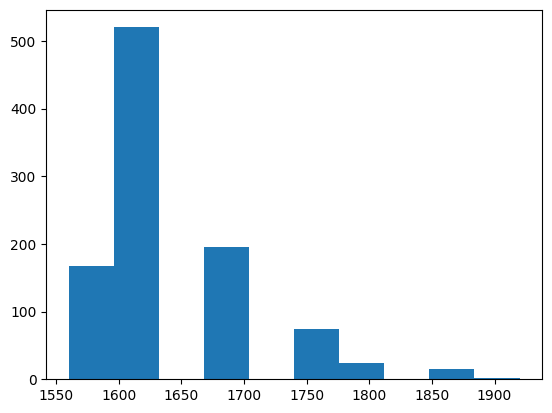

In [12]:
# Plot.
import matplotlib.pyplot as plt

plt.hist(df['delivery_time'])
plt.show()